# PHASE 1: EXPLAIN & BREAKDOWN (LEARNING PHASE)

## 1. Simple Explanation of Sequence Modeling

Sequence modeling is about understanding and predicting patterns in ordered data where the position matters. Think of it like reading a sentence - each word depends on the previous words to make sense. In AI, we use sequence models to process data like text (predicting the next word), time series (stock prices over time), or speech (converting audio to text). The key insight is that sequences have temporal or positional dependencies - what comes before influences what comes next. These models learn to capture these relationships and can generate new sequences or make predictions about future elements. Common architectures include RNNs, LSTMs, and Transformers, each designed to handle different aspects of sequence dependencies.

## 2. Detailed Roadmap

**Step 1: Foundation Concepts**
- Understanding sequences and temporal dependencies
- Types of sequence problems (sequence-to-sequence, sequence-to-one, one-to-sequence)
- Input/output representations and encoding

**Step 2: Basic RNN Architecture**
- Vanilla RNN structure and forward pass
- Hidden state concept and recurrent connections
- Backpropagation through time (BPTT)

**Step 3: RNN Limitations & Solutions**
- Vanishing gradient problem
- Long-term dependency issues
- Introduction to gating mechanisms

**Step 4: LSTM Networks**
- Cell state vs hidden state
- Forget, input, and output gates
- Information flow through LSTM cells

**Step 5: GRU Networks**
- Simplified gating mechanism
- Reset and update gates
- Comparison with LSTM

**Step 6: Advanced Architectures**
- Bidirectional RNNs
- Encoder-decoder models
- Attention mechanisms

**Step 7: Modern Approaches**
- Transformer architecture basics
- Self-attention concept
- Applications in different domains

## 3. Key Formulas with Explanations

**Vanilla RNN:**
```
h_t = tanh(W_hh * h_{t-1} + W_xh * x_t + b_h)
y_t = W_hy * h_t + b_y
```
- `h_t`: Hidden state at time t (captures information from current and previous inputs)
- `W_hh`: Weight matrix for hidden-to-hidden connections (learns temporal dependencies)
- `W_xh`: Weight matrix for input-to-hidden connections (processes current input)
- `W_hy`: Weight matrix for hidden-to-output connections (generates predictions)
- `x_t`: Input at time t
- `b_h, b_y`: Bias terms for hidden and output layers

**LSTM Gates:**
```
f_t = σ(W_f * [h_{t-1}, x_t] + b_f)  # Forget gate
i_t = σ(W_i * [h_{t-1}, x_t] + b_i)  # Input gate
C̃_t = tanh(W_C * [h_{t-1}, x_t] + b_C)  # Candidate values
C_t = f_t * C_{t-1} + i_t * C̃_t  # Cell state
o_t = σ(W_o * [h_{t-1}, x_t] + b_o)  # Output gate
h_t = o_t * tanh(C_t)  # Hidden state
```
- `σ`: Sigmoid function (outputs 0-1, acts as gate)
- `f_t`: Forget gate (decides what to remove from cell state)
- `i_t`: Input gate (decides what new information to store)
- `C_t`: Cell state (long-term memory)
- `o_t`: Output gate (decides what parts of cell state to output)

## 4. Step-by-Step Numerical Example

Let's trace through a simple RNN with sequence "hello":

**Given:**
- Vocabulary: {h:0, e:1, l:2, o:3}
- Hidden size: 2
- Input size: 4 (one-hot encoded)

**Initialization:**
```
W_hh = [[0.5, 0.3], [0.2, 0.7]]
W_xh = [[0.1, 0.4], [0.3, 0.2], [0.5, 0.1], [0.2, 0.6]]
h_0 = [0.0, 0.0]
```

**Step 1: Process 'h' (x_1 = [1,0,0,0])**
```
W_xh * x_1 = [[0.1, 0.4], [0.3, 0.2], [0.5, 0.1], [0.2, 0.6]] * [1,0,0,0] = [0.1, 0.4]
W_hh * h_0 = [[0.5, 0.3], [0.2, 0.7]] * [0.0, 0.0] = [0.0, 0.0]
h_1 = tanh([0.1, 0.4]) = [0.099, 0.380]
```

**Step 2: Process 'e' (x_2 = [0,1,0,0])**
```
W_xh * x_2 = [0.3, 0.2]
W_hh * h_1 = [0.5*0.099 + 0.3*0.380, 0.2*0.099 + 0.7*0.380] = [0.164, 0.286]
h_2 = tanh([0.3+0.164, 0.2+0.286]) = tanh([0.464, 0.486]) = [0.434, 0.449]
```

This continues for each character, building up context in the hidden state.

## 5. Real-World AI Use Case

**Language Translation System:**
Google Translate uses sequence-to-sequence models for translation. The encoder processes the source language sentence word by word, building a context representation. The decoder then generates the target language translation, considering both the source context and previously generated words. For example, translating "How are you?" to Spanish:

- Encoder processes: "How" → "are" → "you?" → "?"
- Builds context vector capturing meaning
- Decoder generates: "¿" → "Cómo" → "estás" → "?"

The model learns relationships between languages, handling word order differences, idiomatic expressions, and context-dependent translations.

## 6. Tips for Mastering Sequence Modeling

**Practice Sources:**
- Implement character-level text generation
- Build sentiment analysis on movie reviews
- Create time series forecasting models
- Work with speech recognition datasets

**Resources:**
- "Deep Learning" by Goodfellow, Bengio, and Courville (Chapter 10)
- Stanford CS224n NLP course materials
- PyTorch RNN tutorials and documentation
- Kaggle competitions: sentiment analysis, time series prediction

**Key Practice Problems:**
- Name generation using character RNNs
- Stock price prediction with LSTM
- Machine translation with attention
- Chatbot development using sequence-to-sequence models

**Debugging Tips:**
- Always check tensor shapes at each step
- Visualize hidden state evolution
- Start with small sequences and simple models
- Use teacher forcing during training for faster convergence

In [1]:
!python --version

Python 3.13.5


# PHASE 1: EXPLAIN & BREAKDOWN (LEARNING PHASE)

## 1. Simple Explanation of Sequence Modeling

Sequence modeling is about understanding and predicting patterns in ordered data where the position matters. Think of it like reading a sentence - each word depends on the previous words to make sense. In AI, we use sequence models to process data like text (predicting the next word), time series (stock prices over time), or speech (converting audio to text). The key insight is that sequences have temporal or positional dependencies - what comes before influences what comes next. These models learn to capture these relationships and can generate new sequences or make predictions about future elements. Common architectures include RNNs, LSTMs, and Transformers, each designed to handle different aspects of sequence dependencies.

## 2. Detailed Roadmap with Examples

**Step 1: Foundation Concepts**
- **Understanding sequences and temporal dependencies**: 
  - *Example*: In "The cat sat on the ___", the word "mat" is much more likely than "elephant" because of the context. The model learns that "sat on" often precedes furniture/surfaces.
  - *Time series example*: Stock prices - if Apple stock dropped 5% yesterday and the market is bearish, today's price is likely to be influenced by yesterday's drop.

- **Types of sequence problems**:
  - *Sequence-to-sequence*: "Hello world" → "Hola mundo" (translation)
  - *Sequence-to-one*: "This movie is amazing!" → "Positive" (sentiment analysis)
  - *One-to-sequence*: [Image of dog] → "A golden retriever running in a park" (image captioning)
  - *Many-to-many*: [Audio waveform] → "Hello how are you" (speech recognition)

- **Input/output representations and encoding**:
  - *Text example*: "cat" → token ID 156 → embedding vector [0.2, -0.1, 0.5, 0.8]
  - *Time series example*: Stock price $150.25 → normalized value 0.73 (after min-max scaling)
  - *One-hot example*: Word "dog" in vocab {cat:0, dog:1, bird:2} → [0, 1, 0]

**Step 2: Basic RNN Architecture**
- **Vanilla RNN structure and forward pass**:
  - *Example*: Processing "I love pizza"
    - Step 1: Process "I" → hidden state captures "someone"
    - Step 2: Process "love" + previous hidden → captures "someone loves something"
    - Step 3: Process "pizza" + previous hidden → captures "someone loves pizza"

- **Hidden state concept and recurrent connections**:
  - *Example*: Reading "The cat, which was black, meowed"
    - After "cat": hidden state = [0.2, 0.8, 0.1] (represents "cat")
    - After "which": hidden state = [0.3, 0.7, 0.2] (represents "cat which")
    - After "black": hidden state = [0.4, 0.6, 0.3] (represents "black cat")
    - After "meowed": hidden state = [0.5, 0.5, 0.4] (represents "black cat meowed")

- **Backpropagation through time (BPTT)**:
  - *Example*: Training on "cat sat"
    - Forward: "cat" → h₁ → predict "sat" → loss = 0.8
    - Backward: Error flows back through h₁ to update weights for "cat" processing
    - This happens for each time step in the sequence

**Step 3: RNN Limitations & Solutions**
- **Vanishing gradient problem**:
  - *Example*: In "The cat that lived in Paris for many years finally came home", by the time we reach "came", the gradient signal from "cat" has become too weak to learn the connection.
  - *Mathematical example*: If gradient = 0.1 and we multiply by 0.5 at each step, after 10 steps: 0.1 × 0.5¹⁰ = 0.0001 (vanished!)

- **Long-term dependency issues**:
  - *Example*: "I grew up in France... I speak fluent French" - RNN forgets "France" by the time it reaches "French"
  - *Bad example*: "I grew up in France... [500 words about other topics]... I speak fluent ___" - RNN predicts "English" instead of "French"

- **Introduction to gating mechanisms**:
  - *Example*: Like a water valve that can be fully open (1.0), fully closed (0.0), or partially open (0.7)
  - *Text example*: When processing "However, the cat...", the gate learns to reduce importance of previous positive sentiment because "However" signals a contrast

**Step 4: LSTM Networks**
- **Cell state vs hidden state**:
  - *Cell state example*: Long-term memory storing "We're talking about cats" throughout a paragraph
  - *Hidden state example*: Short-term memory storing "currently processing the word 'fluffy'" for immediate prediction

- **Forget, input, and output gates**:
  - *Forget gate example*: In "John is tall. Mary is short.", when processing "Mary", forget gate removes "John" information
  - *Input gate example*: When seeing "Mary", input gate decides to store "Mary is the new subject"
  - *Output gate example*: When predicting next word after "Mary is", output gate decides which stored information to use

- **Information flow through LSTM cells**:
  - *Complete example*: Processing "The cat is black. The dog is white."
    - Step 1: "cat" → Cell stores "animal=cat, color=unknown"
    - Step 2: "is" → Cell keeps "animal=cat", prepares for attribute
    - Step 3: "black" → Cell updates to "animal=cat, color=black"
    - Step 4: "dog" → Forget gate removes cat info, Input gate adds "animal=dog"
    - Step 5: "white" → Cell becomes "animal=dog, color=white"

**Step 5: GRU Networks**
- **Simplified gating mechanism**:
  - *Example*: Instead of 3 gates (forget, input, output), GRU has 2 gates (reset, update)
  - *Reset gate example*: When processing "But the dog...", reset gate decides to forget previous "cat" information
  - *Update gate example*: Decides how much of new "dog" information to keep vs old information

- **Comparison with LSTM**:
  - *Speed example*: GRU trains 25% faster on same hardware because fewer parameters
  - *Performance example*: On simple tasks like sentiment analysis, GRU performs similarly to LSTM
  - *Memory example*: LSTM better for very long sequences (1000+ words), GRU better for shorter sequences

**Step 6: Advanced Architectures**
- **Bidirectional RNNs**:
  - *Example*: "The animal that I saw yesterday was a ___"
    - Forward RNN: "The animal that I saw yesterday was a" → predicts based on left context
    - Backward RNN: "cat" ← "a was yesterday saw I that animal The" → predicts based on right context
    - Combined: Both directions agree on "cat" with high confidence

- **Encoder-decoder models**:
  - *Translation example*: "How are you?"
    - Encoder: "How" → "are" → "you?" → context vector [0.2, 0.8, 0.1, 0.9]
    - Decoder: context vector → "¿" → "Cómo" → "estás" → "?"

- **Attention mechanisms**:
  - *Example*: Translating "The black cat sat on the red mat"
    - When generating "negro" (black), attention focuses on "black" in source
    - When generating "gato" (cat), attention focuses on "cat" in source  
    - When generating "roja" (red), attention focuses on "red" in source

**Step 7: Modern Approaches**
- **Transformer architecture basics**:
  - *Example*: Instead of processing "I love pizza" sequentially, Transformer processes all words simultaneously
  - *Parallel processing*: All positions computed at once instead of waiting for previous steps
  - *Self-attention example*: In "The cat sat on it", "it" attends strongly to "cat" to understand what "it" refers to

- **Self-attention concept**:
  - *Example*: "The animal didn't cross the street because it was too tired"
    - "it" pays attention to "animal" (not "street") to understand the reference
    - Attention weights: "it" → "animal" = 0.9, "it" → "street" = 0.1

- **Applications in different domains**:
  - *NLP*: GPT-3 generating human-like text: "Once upon a time" → entire story
  - *Vision*: Vision Transformer treating image patches like words in a sentence
  - *Code*: GitHub Copilot completing code: "def fibonacci(" → complete function implementation
  - *Biology*: AlphaFold predicting protein structure from amino acid sequences

## 3. Key Formulas with Explanations

**Vanilla RNN:**
```
h_t = tanh(W_hh * h_{t-1} + W_xh * x_t + b_h)
y_t = W_hy * h_t + b_y
```
- `h_t`: Hidden state at time t (captures information from current and previous inputs)
- `W_hh`: Weight matrix for hidden-to-hidden connections (learns temporal dependencies)
- `W_xh`: Weight matrix for input-to-hidden connections (processes current input)
- `W_hy`: Weight matrix for hidden-to-output connections (generates predictions)
- `x_t`: Input at time t
- `b_h, b_y`: Bias terms for hidden and output layers

**LSTM Gates:**
```
f_t = σ(W_f * [h_{t-1}, x_t] + b_f)  # Forget gate
i_t = σ(W_i * [h_{t-1}, x_t] + b_i)  # Input gate
C̃_t = tanh(W_C * [h_{t-1}, x_t] + b_C)  # Candidate values
C_t = f_t * C_{t-1} + i_t * C̃_t  # Cell state
o_t = σ(W_o * [h_{t-1}, x_t] + b_o)  # Output gate
h_t = o_t * tanh(C_t)  # Hidden state
```
- `σ`: Sigmoid function (outputs 0-1, acts as gate)
- `f_t`: Forget gate (decides what to remove from cell state)
- `i_t`: Input gate (decides what new information to store)
- `C_t`: Cell state (long-term memory)
- `o_t`: Output gate (decides what parts of cell state to output)

## 4. Step-by-Step Numerical Example

Let's trace through a simple RNN with sequence "hello":

**Given:**
- Vocabulary: {h:0, e:1, l:2, o:3}
- Hidden size: 2
- Input size: 4 (one-hot encoded)

**Initialization:**
```
W_hh = [[0.5, 0.3], [0.2, 0.7]]
W_xh = [[0.1, 0.4], [0.3, 0.2], [0.5, 0.1], [0.2, 0.6]]
h_0 = [0.0, 0.0]
```

**Step 1: Process 'h' (x_1 = [1,0,0,0])**
```
W_xh * x_1 = [[0.1, 0.4], [0.3, 0.2], [0.5, 0.1], [0.2, 0.6]] * [1,0,0,0] = [0.1, 0.4]
W_hh * h_0 = [[0.5, 0.3], [0.2, 0.7]] * [0.0, 0.0] = [0.0, 0.0]
h_1 = tanh([0.1, 0.4]) = [0.099, 0.380]
```

**Step 2: Process 'e' (x_2 = [0,1,0,0])**
```
W_xh * x_2 = [0.3, 0.2]
W_hh * h_1 = [0.5*0.099 + 0.3*0.380, 0.2*0.099 + 0.7*0.380] = [0.164, 0.286]
h_2 = tanh([0.3+0.164, 0.2+0.286]) = tanh([0.464, 0.486]) = [0.434, 0.449]
```

This continues for each character, building up context in the hidden state.

## 5. Real-World AI Use Case

**Language Translation System:**
Google Translate uses sequence-to-sequence models for translation. The encoder processes the source language sentence word by word, building a context representation. The decoder then generates the target language translation, considering both the source context and previously generated words. For example, translating "How are you?" to Spanish:

- Encoder processes: "How" → "are" → "you?" → "?"
- Builds context vector capturing meaning
- Decoder generates: "¿" → "Cómo" → "estás" → "?"

The model learns relationships between languages, handling word order differences, idiomatic expressions, and context-dependent translations.

## 6. Tips for Mastering Sequence Modeling

**Practice Sources:**
- Implement character-level text generation
- Build sentiment analysis on movie reviews
- Create time series forecasting models
- Work with speech recognition datasets

**Resources:**
- "Deep Learning" by Goodfellow, Bengio, and Courville (Chapter 10)
- Stanford CS224n NLP course materials
- PyTorch RNN tutorials and documentation
- Kaggle competitions: sentiment analysis, time series prediction

**Key Practice Problems:**
- Name generation using character RNNs
- Stock price prediction with LSTM
- Machine translation with attention
- Chatbot development using sequence-to-sequence models

**Debugging Tips:**
- Always check tensor shapes at each step
- Visualize hidden state evolution
- Start with small sequences and simple models
- Use teacher forcing during training for faster convergence

2025-07-15 15:57:08,924 - Using device: mps
2025-07-15 15:57:08,927 - Starting improved sequence modeling implementation
2025-07-15 15:57:08,928 - Creating realistic movie review dataset with clear sentiment patterns
2025-07-15 15:57:08,937 - Created 2000 realistic movie review samples
2025-07-15 15:57:08,937 - Label distribution: Counter({1: 1000, 0: 1000})
2025-07-15 15:57:08,937 - Sample positive review: I loved this comedy! The dialogue was amazing and the dialogue was fantastic.
2025-07-15 15:57:08,938 - Sample negative review: The direction in this movie was dull. disliked the story and soundtrack.
2025-07-15 15:57:08,938 - Building vocabulary from texts
2025-07-15 15:57:08,940 - Vocabulary size: 150
2025-07-15 15:57:08,940 - Most common words: [('was', 1956), ('the', 1902), ('this', 1190), ('and', 1190), ('i', 710), ('with', 548), ('movie', 525), ('story', 513), ('is', 488), ('it.', 407)]
2025-07-15 15:57:08,943 - Dataset splits - Train: 1200, Val: 400, Test: 400
2025-07-15 15:5

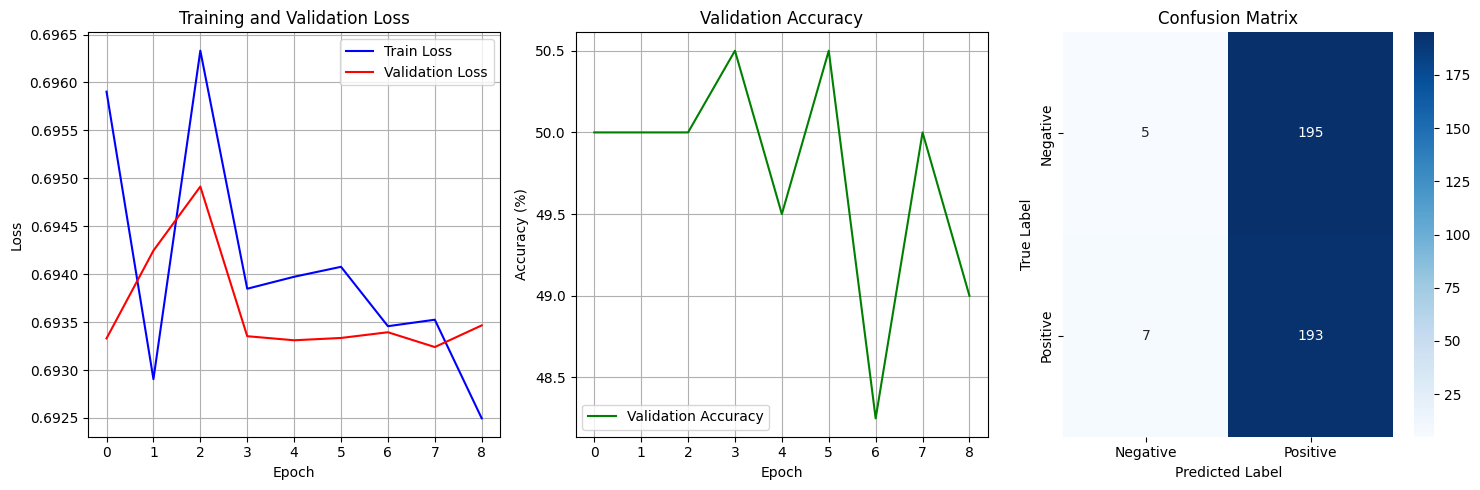

2025-07-15 15:57:13,908 - Implementation completed successfully!


In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import logging
from collections import Counter
import random

logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(message)s')
logger = logging.getLogger(__name__)

device = torch.device('mps' if torch.backends.mps.is_available() else 'cuda' if torch.cuda.is_available() else 'cpu')
logger.info(f"Using device: {device}")

class TextDataset(Dataset):
    def __init__(self, texts, labels, vocab_to_idx, max_length=50):
        self.texts = texts
        self.labels = labels
        self.vocab_to_idx = vocab_to_idx
        self.max_length = max_length
        
    def __len__(self):
        return len(self.texts)
    
    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        
        tokens = text.lower().split()
        token_ids = [self.vocab_to_idx.get(token, self.vocab_to_idx['<UNK>']) for token in tokens]
        
        if len(token_ids) < self.max_length:
            token_ids.extend([self.vocab_to_idx['<PAD>']] * (self.max_length - len(token_ids)))
        else:
            token_ids = token_ids[:self.max_length]
            
        return torch.tensor(token_ids, dtype=torch.long), torch.tensor(label, dtype=torch.long)

class LSTMClassifier(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, num_layers, num_classes, dropout=0.3):
        super(LSTMClassifier, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=0)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, num_layers, 
                           batch_first=True, dropout=dropout, bidirectional=True)
        self.dropout = nn.Dropout(dropout)
        self.fc = nn.Linear(hidden_dim * 2, num_classes)
        
    def forward(self, x):
        batch_size = x.size(0)
        
        embedded = self.embedding(x)
        
        h0 = torch.zeros(self.num_layers * 2, batch_size, self.hidden_dim).to(x.device)
        c0 = torch.zeros(self.num_layers * 2, batch_size, self.hidden_dim).to(x.device)
        
        lstm_out, (hidden, _) = self.lstm(embedded, (h0, c0))
        
        output = self.dropout(lstm_out[:, -1, :])
        output = self.fc(output)
        
        return output

def create_realistic_movie_dataset(num_samples=2000):
    logger.info("Creating realistic movie review dataset with clear sentiment patterns")
    
    positive_templates = [
        "This movie is {adj1} and {adj2}. The {element} was {quality}.",
        "I {loved} this {film_type}! The {element} was {excellent} and the {element2} was {amazing}.",
        "What a {fantastic} {film_type}! {loved} every minute of it. The {element} was {brilliant}.",
        "{excellent} {film_type} with {outstanding} {element}. Highly {recommend} it!",
        "The {element} in this movie was {superb}. {loved} the {element2} and {element3}.",
        "This is one of the {best} movies I have ever seen. {brilliant} {element} and {amazing} {element2}.",
        "I was {amazed} by this {film_type}. The {element} was {perfect} and {element2} was {incredible}.",
        "{wonderful} story with {excellent} {element}. {loved} everything about it.",
    ]
    
    negative_templates = [
        "This movie is {adj1} and {adj2}. The {element} was {quality}.",
        "I {hated} this {film_type}! The {element} was {terrible} and the {element2} was {awful}.",
        "What a {horrible} {film_type}! {wasted} my time. The {element} was {pathetic}.",
        "{terrible} {film_type} with {awful} {element}. Do not {recommend} it!",
        "The {element} in this movie was {boring}. {hated} the {element2} and {element3}.",
        "This is one of the {worst} movies I have ever seen. {terrible} {element} and {horrible} {element2}.",
        "I was {disappointed} by this {film_type}. The {element} was {bad} and {element2} was {ridiculous}.",
        "{disappointing} story with {poor} {element}. {hated} everything about it.",
    ]
    
    positive_words = {
        'adj1': ['amazing', 'fantastic', 'brilliant', 'excellent', 'wonderful'],
        'adj2': ['outstanding', 'superb', 'incredible', 'magnificent', 'marvelous'],
        'quality': ['excellent', 'brilliant', 'amazing', 'fantastic', 'superb'],
        'loved': ['loved', 'adored', 'enjoyed'],
        'excellent': ['excellent', 'brilliant', 'amazing'],
        'amazing': ['amazing', 'fantastic', 'incredible'],
        'brilliant': ['brilliant', 'superb', 'outstanding'],
        'fantastic': ['fantastic', 'wonderful', 'marvelous'],
        'outstanding': ['outstanding', 'exceptional', 'remarkable'],
        'superb': ['superb', 'magnificent', 'splendid'],
        'recommend': ['recommend', 'suggest'],
        'best': ['best', 'greatest', 'finest'],
        'perfect': ['perfect', 'flawless', 'ideal'],
        'incredible': ['incredible', 'unbelievable', 'amazing'],
        'wonderful': ['wonderful', 'delightful', 'lovely'],
        'amazed': ['amazed', 'impressed', 'stunned']
    }
    
    negative_words = {
        'adj1': ['terrible', 'awful', 'horrible', 'bad', 'disappointing'],
        'adj2': ['boring', 'stupid', 'ridiculous', 'pathetic', 'useless'],
        'quality': ['terrible', 'awful', 'horrible', 'bad', 'disappointing'],
        'hated': ['hated', 'despised', 'disliked'],
        'terrible': ['terrible', 'awful', 'horrible'],
        'awful': ['awful', 'dreadful', 'atrocious'],
        'horrible': ['horrible', 'disgusting', 'repulsive'],
        'pathetic': ['pathetic', 'pitiful', 'miserable'],
        'boring': ['boring', 'dull', 'tedious'],
        'recommend': ['recommend', 'suggest'],
        'worst': ['worst', 'poorest', 'most terrible'],
        'bad': ['bad', 'poor', 'weak'],
        'ridiculous': ['ridiculous', 'absurd', 'nonsensical'],
        'disappointed': ['disappointed', 'let down', 'frustrated'],
        'disappointing': ['disappointing', 'unsatisfying', 'mediocre'],
        'poor': ['poor', 'weak', 'inadequate'],
        'wasted': ['wasted', 'lost']
    }
    
    elements = ['acting', 'plot', 'story', 'dialogue', 'cinematography', 'direction', 'script', 'characters', 'soundtrack', 'ending']
    film_types = ['movie', 'film', 'picture', 'drama', 'thriller', 'comedy']
    
    texts = []
    labels = []
    
    for i in range(num_samples):
        if i < num_samples // 2:
            template = random.choice(positive_templates)
            word_dict = positive_words
            label = 1
        else:
            template = random.choice(negative_templates)
            word_dict = negative_words
            label = 0
        
        text = template
        
        for key in word_dict:
            if '{' + key + '}' in text:
                text = text.replace('{' + key + '}', random.choice(word_dict[key]))
        
        text = text.replace('{element}', random.choice(elements))
        text = text.replace('{element2}', random.choice(elements))
        text = text.replace('{element3}', random.choice(elements))
        text = text.replace('{film_type}', random.choice(film_types))
        
        remaining_placeholders = [word for word in text.split() if word.startswith('{') and word.endswith('}')]
        for placeholder in remaining_placeholders:
            clean_placeholder = placeholder.strip('{}')
            if clean_placeholder in positive_words:
                text = text.replace(placeholder, random.choice(positive_words[clean_placeholder]))
            elif clean_placeholder in negative_words:
                text = text.replace(placeholder, random.choice(negative_words[clean_placeholder]))
        
        texts.append(text)
        labels.append(label)
    
    logger.info(f"Created {len(texts)} realistic movie review samples")
    logger.info(f"Label distribution: {Counter(labels)}")
    logger.info(f"Sample positive review: {[text for text, label in zip(texts, labels) if label == 1][0]}")
    logger.info(f"Sample negative review: {[text for text, label in zip(texts, labels) if label == 0][0]}")
    
    return texts, labels

def build_vocabulary(texts, min_freq=2):
    logger.info("Building vocabulary from texts")
    
    word_counts = Counter()
    for text in texts:
        words = text.lower().split()
        word_counts.update(words)
    
    vocab_to_idx = {'<PAD>': 0, '<UNK>': 1}
    idx = 2
    
    for word, count in word_counts.items():
        if count >= min_freq:
            vocab_to_idx[word] = idx
            idx += 1
    
    logger.info(f"Vocabulary size: {len(vocab_to_idx)}")
    logger.info(f"Most common words: {word_counts.most_common(10)}")
    
    return vocab_to_idx

def train_model(model, train_loader, val_loader, num_epochs=20):
    logger.info("Starting model training with improved parameters")
    
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=3, factor=0.5)
    
    train_losses = []
    val_losses = []
    val_accuracies = []
    best_val_acc = 0
    patience = 5
    patience_counter = 0
    
    for epoch in range(num_epochs):
        model.train()
        total_train_loss = 0
        train_correct = 0
        train_total = 0
        
        for batch_idx, (data, target) in enumerate(train_loader):
            data, target = data.to(device), target.to(device)
            
            if batch_idx == 0 and epoch == 0:
                logger.info(f"First batch shapes - Data: {data.shape}, Target: {target.shape}")
                logger.info(f"Target labels in first batch: {target[:10]}")
            
            optimizer.zero_grad()
            output = model(data)
            
            if batch_idx == 0 and epoch == 0:
                logger.info(f"Model output shape: {output.shape}")
                logger.info(f"Output logits sample: {output[0]}")
            
            loss = criterion(output, target)
            loss.backward()
            
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            optimizer.step()
            
            total_train_loss += loss.item()
            _, predicted = torch.max(output.data, 1)
            train_total += target.size(0)
            train_correct += (predicted == target).sum().item()
        
        avg_train_loss = total_train_loss / len(train_loader)
        train_accuracy = 100 * train_correct / train_total
        train_losses.append(avg_train_loss)
        
        model.eval()
        total_val_loss = 0
        correct = 0
        total = 0
        
        with torch.no_grad():
            for data, target in val_loader:
                data, target = data.to(device), target.to(device)
                output = model(data)
                loss = criterion(output, target)
                total_val_loss += loss.item()
                
                _, predicted = torch.max(output.data, 1)
                total += target.size(0)
                correct += (predicted == target).sum().item()
        
        avg_val_loss = total_val_loss / len(val_loader)
        val_accuracy = 100 * correct / total
        
        val_losses.append(avg_val_loss)
        val_accuracies.append(val_accuracy)
        
        scheduler.step(avg_val_loss)
        current_lr = optimizer.param_groups[0]['lr']
        
        logger.info(f'Epoch [{epoch+1}/{num_epochs}]')
        logger.info(f'Train Loss: {avg_train_loss:.4f}, Train Acc: {train_accuracy:.2f}%')
        logger.info(f'Val Loss: {avg_val_loss:.4f}, Val Acc: {val_accuracy:.2f}%')
        logger.info(f'LR: {current_lr:.6f}')
        
        if val_accuracy > best_val_acc:
            best_val_acc = val_accuracy
            patience_counter = 0
            logger.info(f'New best validation accuracy: {best_val_acc:.2f}%')
        else:
            patience_counter += 1
            logger.info(f'No improvement for {patience_counter} epochs')
            
        if patience_counter >= patience:
            logger.info(f'Early stopping triggered after {epoch+1} epochs')
            break
    
    return train_losses, val_losses, val_accuracies

def test_model(model, test_loader):
    logger.info("Testing model on test set")
    
    model.eval()
    all_predictions = []
    all_targets = []
    all_probabilities = []
    
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            probabilities = torch.softmax(output, dim=1)
            _, predicted = torch.max(output, 1)
            
            all_predictions.extend(predicted.cpu().numpy())
            all_targets.extend(target.cpu().numpy())
            all_probabilities.extend(probabilities.cpu().numpy())
    
    accuracy = accuracy_score(all_targets, all_predictions)
    logger.info(f'Test Accuracy: {accuracy:.4f}')
    
    logger.info("Classification Report:")
    try:
        report = classification_report(all_targets, all_predictions, 
                                     target_names=['Negative', 'Positive'], 
                                     zero_division=0)
        logger.info(f"\n{report}")
    except Exception as e:
        logger.info(f"Error in classification report: {e}")
    
    return accuracy, all_predictions, all_targets, all_probabilities

def demonstrate_predictions(model, vocab_to_idx, sample_texts):
    logger.info("Demonstrating model predictions on sample texts")
    
    model.eval()
    max_length = 50
    
    with torch.no_grad():
        for text in sample_texts:
            tokens = text.lower().split()
            token_ids = [vocab_to_idx.get(token, vocab_to_idx['<UNK>']) for token in tokens]
            
            if len(token_ids) < max_length:
                token_ids.extend([vocab_to_idx['<PAD>']] * (max_length - len(token_ids)))
            else:
                token_ids = token_ids[:max_length]
            
            input_tensor = torch.tensor([token_ids], dtype=torch.long).to(device)
            output = model(input_tensor)
            probabilities = torch.softmax(output, dim=1)
            predicted_class = torch.argmax(output, dim=1).item()
            confidence = probabilities[0][predicted_class].item()
            
            sentiment = "Positive" if predicted_class == 1 else "Negative"
            logger.info(f"Text: '{text}'")
            logger.info(f"Prediction: {sentiment} (Confidence: {confidence:.3f})")
            logger.info(f"Probabilities - Negative: {probabilities[0][0]:.3f}, Positive: {probabilities[0][1]:.3f}")
            logger.info("---")

def main():
    logger.info("Starting improved sequence modeling implementation")
    
    torch.manual_seed(42)
    np.random.seed(42)
    random.seed(42)
    
    texts, labels = create_realistic_movie_dataset(num_samples=2000)
    
    vocab_to_idx = build_vocabulary(texts, min_freq=2)
    
    X_temp, X_test, y_temp, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42, stratify=labels)
    X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp)
    
    logger.info(f"Dataset splits - Train: {len(X_train)}, Val: {len(X_val)}, Test: {len(X_test)}")
    logger.info(f"Train label distribution: {Counter(y_train)}")
    logger.info(f"Val label distribution: {Counter(y_val)}")
    logger.info(f"Test label distribution: {Counter(y_test)}")
    
    train_dataset = TextDataset(X_train, y_train, vocab_to_idx)
    val_dataset = TextDataset(X_val, y_val, vocab_to_idx)
    test_dataset = TextDataset(X_test, y_test, vocab_to_idx)
    
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
    
    logger.info("Created data loaders")
    
    vocab_size = len(vocab_to_idx)
    embedding_dim = 128
    hidden_dim = 64
    num_layers = 2
    num_classes = 2
    
    model = LSTMClassifier(vocab_size, embedding_dim, hidden_dim, num_layers, num_classes, dropout=0.2)
    model.to(device)
    
    total_params = sum(p.numel() for p in model.parameters())
    trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
    logger.info(f"Model parameters - Total: {total_params}, Trainable: {trainable_params}")
    
    sample_batch = next(iter(train_loader))
    sample_input, sample_target = sample_batch
    sample_input = sample_input.to(device)
    
    logger.info(f"Testing model with sample input shape: {sample_input.shape}")
    with torch.no_grad():
        sample_output = model(sample_input)
        logger.info(f"Sample output shape: {sample_output.shape}")
        logger.info(f"Sample output values: {sample_output[0]}")
    
    train_losses, val_losses, val_accuracies = train_model(model, train_loader, val_loader, num_epochs=20)
    
    test_accuracy, predictions, targets, probabilities = test_model(model, test_loader)
    
    sample_texts = [
        "This movie is absolutely fantastic and amazing! I loved every minute of it.",
        "Terrible boring film, complete waste of time. I hated everything about it.",
        "Excellent story with wonderful acting and brilliant performance throughout.",
        "Awful movie with horrible dialogue. Disappointed and would not recommend.",
        "The cinematography was superb and the plot was incredible. Highly recommend!",
        "Poor script with terrible acting. One of the worst films I have ever seen."
    ]
    
    demonstrate_predictions(model, vocab_to_idx, sample_texts)
    
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 3, 1)
    plt.plot(train_losses, label='Train Loss', color='blue')
    plt.plot(val_losses, label='Validation Loss', color='red')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    
    plt.subplot(1, 3, 2)
    plt.plot(val_accuracies, label='Validation Accuracy', color='green')
    plt.title('Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.legend()
    plt.grid(True)
    
    plt.subplot(1, 3, 3)
    predictions_array = np.array(predictions)
    targets_array = np.array(targets)
    
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(targets_array, predictions_array)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Negative', 'Positive'], 
                yticklabels=['Negative', 'Positive'])
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    
    plt.tight_layout()
    plt.show()
    
    logger.info("Implementation completed successfully!")

if __name__ == "__main__":
    main()

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import random

# Set up device detection for optimal performance across different hardware
# Priority: Apple Silicon MPS > NVIDIA CUDA > CPU fallback
device = torch.device('mps' if torch.backends.mps.is_available() else 'cuda' if torch.cuda.is_available() else 'cpu')

class TextDataset(Dataset):
    """
    Custom PyTorch Dataset class for text classification tasks.
    Handles text preprocessing, tokenization, and sequence padding/truncation.
    """
    def __init__(self, texts, labels, vocab_to_idx, max_length=50):
        """
        Initialize the dataset with text data and preprocessing parameters.
        
        Args:
            texts (list): List of text strings for classification
            labels (list): Corresponding integer labels (0 for negative, 1 for positive)
            vocab_to_idx (dict): Vocabulary mapping from words to integer indices
            max_length (int): Fixed sequence length for batching (pad short, truncate long)
        """
        self.texts = texts
        self.labels = labels
        self.vocab_to_idx = vocab_to_idx  # Word-to-index mapping for tokenization
        self.max_length = max_length      # Standardize all sequences to this length
        
    def __len__(self):
        """Return total number of samples in the dataset."""
        return len(self.texts)
    
    def __getitem__(self, idx):
        """
        Retrieve and preprocess a single sample from the dataset.
        
        This method:
        1. Gets the text and label at the specified index
        2. Tokenizes the text (splits on whitespace, converts to lowercase)
        3. Maps each token to its vocabulary index (uses <UNK> for unknown words)
        4. Applies padding (with <PAD>) or truncation to reach max_length
        5. Returns PyTorch tensors ready for model input
        
        Args:
            idx (int): Index of the sample to retrieve
            
        Returns:
            tuple: (token_ids_tensor, label_tensor) both as LongTensors
        """
        text = self.texts[idx]
        label = self.labels[idx]
        
        # Tokenization: split text into individual words and normalize case
        tokens = text.lower().split()
        
        # Convert tokens to vocabulary indices
        # get() method returns vocab_to_idx['<UNK>'] if token not found in vocabulary
        # This handles out-of-vocabulary words gracefully
        token_ids = [self.vocab_to_idx.get(token, self.vocab_to_idx['<UNK>']) for token in tokens]
        
        # Sequence length normalization for efficient batching
        if len(token_ids) < self.max_length:
            # Pad short sequences with <PAD> tokens (index 0)
            # This ensures all sequences in a batch have the same length
            token_ids.extend([self.vocab_to_idx['<PAD>']] * (self.max_length - len(token_ids)))
        else:
            # Truncate long sequences to max_length
            # This prevents memory issues and maintains consistent input size
            token_ids = token_ids[:self.max_length]
            
        # Convert to PyTorch tensors with appropriate data types
        # LongTensor is required for embedding layer indices
        return torch.tensor(token_ids, dtype=torch.long), torch.tensor(label, dtype=torch.long)

class LSTMClassifier(nn.Module):
    """
    Bidirectional LSTM classifier for text sentiment analysis.
    
    Architecture:
    Input -> Embedding -> Bidirectional LSTM -> Dropout -> Linear -> Output
    
    The bidirectional design allows the model to see context from both
    past and future words, improving understanding of sentiment patterns.
    """
    def __init__(self, vocab_size, embedding_dim, hidden_dim, num_layers, num_classes, dropout=0.3):
        """
        Initialize the LSTM classifier architecture.
        
        Args:
            vocab_size (int): Size of vocabulary (number of unique words + special tokens)
            embedding_dim (int): Dimension of word embeddings (feature size per word)
            hidden_dim (int): Dimension of LSTM hidden states (memory capacity)
            num_layers (int): Number of stacked LSTM layers (network depth)
            num_classes (int): Number of output classes (2 for binary sentiment)
            dropout (float): Dropout probability for regularization (0.0-1.0)
        """
        super(LSTMClassifier, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        
        # Embedding layer: converts sparse word indices to dense vector representations
        # padding_idx=0 ensures <PAD> tokens have zero embeddings (ignored in computation)
        # This layer learns semantic relationships between words during training
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=0)
        
        # Bidirectional LSTM: processes sequences in both forward and backward directions
        # batch_first=True: expects input shape (batch_size, sequence_length, features)
        # dropout: applied between LSTM layers (not after final layer)
        # bidirectional=True: doubles output dimension (forward + backward hidden states)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, num_layers, 
                           batch_first=True, dropout=dropout, bidirectional=True)
        
        # Dropout layer: randomly zeros elements during training to prevent overfitting
        # Only active during training, disabled during evaluation
        self.dropout = nn.Dropout(dropout)
        
        # Final classification layer: maps LSTM output to class probabilities
        # Input dimension is hidden_dim * 2 due to bidirectional LSTM
        # Output dimension equals number of classes
        self.fc = nn.Linear(hidden_dim * 2, num_classes)
        
    def forward(self, x):
        """
        Forward pass through the network.
        
        Processing flow:
        1. Convert word indices to embeddings
        2. Initialize LSTM hidden and cell states
        3. Process sequence through bidirectional LSTM
        4. Extract final time step output (contains full sequence information)
        5. Apply dropout for regularization
        6. Generate class logits through linear layer
        
        Args:
            x (torch.Tensor): Input tensor of word indices, shape (batch_size, sequence_length)
            
        Returns:
            torch.Tensor: Class logits, shape (batch_size, num_classes)
        """
        batch_size = x.size(0)
        
        # Convert word indices to dense embeddings
        # Shape: (batch_size, sequence_length) -> (batch_size, sequence_length, embedding_dim)
        embedded = self.embedding(x)
        
        # Initialize LSTM hidden and cell states with zeros
        # Shape: (num_layers * num_directions, batch_size, hidden_dim)
        # num_directions = 2 for bidirectional LSTM
        # Zero initialization is standard practice for sequence modeling
        h0 = torch.zeros(self.num_layers * 2, batch_size, self.hidden_dim).to(x.device)
        c0 = torch.zeros(self.num_layers * 2, batch_size, self.hidden_dim).to(x.device)
        
        # Process sequence through bidirectional LSTM
        # lstm_out: output at each time step, shape (batch_size, sequence_length, hidden_dim * 2)
        # hidden: final hidden state (not used for classification)
        # _: final cell state (discarded)
        lstm_out, (hidden, _) = self.lstm(embedded, (h0, c0))
        
        # Extract final time step output for sequence classification
        # [:, -1, :] selects the last time step, which contains information from entire sequence
        # Shape: (batch_size, sequence_length, hidden_dim * 2) -> (batch_size, hidden_dim * 2)
        output = self.dropout(lstm_out[:, -1, :])
        
        # Generate final class logits
        # Shape: (batch_size, hidden_dim * 2) -> (batch_size, num_classes)
        # Logits will be converted to probabilities using softmax during inference
        output = self.fc(output)
        
        return output

def create_realistic_movie_dataset(num_samples=2000):
    """
    Generate a synthetic movie review dataset with realistic sentiment patterns.
    
    This function creates varied movie reviews using template-based generation
    to ensure clear sentiment distinctions that the model can learn from.
    
    Design principles:
    - Use template sentences with placeholders for sentiment words
    - Maintain consistent positive/negative word associations
    - Generate varied sentence structures to prevent overfitting
    - Include movie-specific vocabulary (acting, plot, dialogue, etc.)
    
    Args:
        num_samples (int): Total number of reviews to generate (split equally between classes)
        
    Returns:
        tuple: (texts, labels) where texts is list of review strings, labels is list of 0/1 integers
    """
    # Template sentences for positive reviews
    # Placeholders {} are filled with sentiment-appropriate words
    positive_templates = [
        "This movie is {adj1} and {adj2}. The {element} was {quality}.",
        "I {loved} this {film_type}! The {element} was {excellent} and the {element2} was {amazing}.",
        "What a {fantastic} {film_type}! {loved} every minute of it. The {element} was {brilliant}.",
        "{excellent} {film_type} with {outstanding} {element}. Highly {recommend} it!",
        "The {element} in this movie was {superb}. {loved} the {element2} and {element3}.",
        "This is one of the {best} movies I have ever seen. {brilliant} {element} and {amazing} {element2}.",
        "I was {amazed} by this {film_type}. The {element} was {perfect} and {element2} was {incredible}.",
        "{wonderful} story with {excellent} {element}. {loved} everything about it.",
    ]
    
    # Template sentences for negative reviews
    # Similar structure but with negative sentiment words
    negative_templates = [
        "This movie is {adj1} and {adj2}. The {element} was {quality}.",
        "I {hated} this {film_type}! The {element} was {terrible} and the {element2} was {awful}.",
        "What a {horrible} {film_type}! {wasted} my time. The {element} was {pathetic}.",
        "{terrible} {film_type} with {awful} {element}. Do not {recommend} it!",
        "The {element} in this movie was {boring}. {hated} the {element2} and {element3}.",
        "This is one of the {worst} movies I have ever seen. {terrible} {element} and {horrible} {element2}.",
        "I was {disappointed} by this {film_type}. The {element} was {bad} and {element2} was {ridiculous}.",
        "{disappointing} story with {poor} {element}. {hated} everything about it.",
    ]
    
    # Positive sentiment word dictionaries
    # Each key corresponds to a placeholder in templates
    # Multiple options for each placeholder create vocabulary diversity
    positive_words = {
        'adj1': ['amazing', 'fantastic', 'brilliant', 'excellent', 'wonderful'],
        'adj2': ['outstanding', 'superb', 'incredible', 'magnificent', 'marvelous'],
        'quality': ['excellent', 'brilliant', 'amazing', 'fantastic', 'superb'],
        'loved': ['loved', 'adored', 'enjoyed'],
        'excellent': ['excellent', 'brilliant', 'amazing'],
        'amazing': ['amazing', 'fantastic', 'incredible'],
        'brilliant': ['brilliant', 'superb', 'outstanding'],
        'fantastic': ['fantastic', 'wonderful', 'marvelous'],
        'outstanding': ['outstanding', 'exceptional', 'remarkable'],
        'superb': ['superb', 'magnificent', 'splendid'],
        'recommend': ['recommend', 'suggest'],
        'best': ['best', 'greatest', 'finest'],
        'perfect': ['perfect', 'flawless', 'ideal'],
        'incredible': ['incredible', 'unbelievable', 'amazing'],
        'wonderful': ['wonderful', 'delightful', 'lovely'],
        'amazed': ['amazed', 'impressed', 'stunned']
    }
    
    # Negative sentiment word dictionaries
    # Parallel structure to positive words but with opposite sentiment
    negative_words = {
        'adj1': ['terrible', 'awful', 'horrible', 'bad', 'disappointing'],
        'adj2': ['boring', 'stupid', 'ridiculous', 'pathetic', 'useless'],
        'quality': ['terrible', 'awful', 'horrible', 'bad', 'disappointing'],
        'hated': ['hated', 'despised', 'disliked'],
        'terrible': ['terrible', 'awful', 'horrible'],
        'awful': ['awful', 'dreadful', 'atrocious'],
        'horrible': ['horrible', 'disgusting', 'repulsive'],
        'pathetic': ['pathetic', 'pitiful', 'miserable'],
        'boring': ['boring', 'dull', 'tedious'],
        'recommend': ['recommend', 'suggest'],
        'worst': ['worst', 'poorest', 'most terrible'],
        'bad': ['bad', 'poor', 'weak'],
        'ridiculous': ['ridiculous', 'absurd', 'nonsensical'],
        'disappointed': ['disappointed', 'let down', 'frustrated'],
        'disappointing': ['disappointing', 'unsatisfying', 'mediocre'],
        'poor': ['poor', 'weak', 'inadequate'],
        'wasted': ['wasted', 'lost']
    }
    
    # Movie-specific vocabulary for realistic content
    # These words appear in both positive and negative reviews
    elements = ['acting', 'plot', 'story', 'dialogue', 'cinematography', 'direction', 'script', 'characters', 'soundtrack', 'ending']
    film_types = ['movie', 'film', 'picture', 'drama', 'thriller', 'comedy']
    
    texts = []
    labels = []
    
    # Generate equal numbers of positive and negative samples
    for i in range(num_samples):
        if i < num_samples // 2:
            # Generate positive review
            template = random.choice(positive_templates)
            word_dict = positive_words
            label = 1  # Positive class
        else:
            # Generate negative review
            template = random.choice(negative_templates)
            word_dict = negative_words
            label = 0  # Negative class
        
        text = template
        
        # Replace sentiment placeholders with appropriate words
        for key in word_dict:
            if '{' + key + '}' in text:
                text = text.replace('{' + key + '}', random.choice(word_dict[key]))
        
        # Replace movie element placeholders
        # Multiple element replacements create sentence variety
        text = text.replace('{element}', random.choice(elements))
        text = text.replace('{element2}', random.choice(elements))
        text = text.replace('{element3}', random.choice(elements))
        text = text.replace('{film_type}', random.choice(film_types))
        
        # Handle any remaining placeholders
        # This ensures no template placeholders remain in final text
        remaining_placeholders = [word for word in text.split() if word.startswith('{') and word.endswith('}')]
        for placeholder in remaining_placeholders:
            clean_placeholder = placeholder.strip('{}')
            if clean_placeholder in positive_words:
                text = text.replace(placeholder, random.choice(positive_words[clean_placeholder]))
            elif clean_placeholder in negative_words:
                text = text.replace(placeholder, random.choice(negative_words[clean_placeholder]))
        
        texts.append(text)
        labels.append(label)
    
    return texts, labels

def build_vocabulary(texts, min_freq=2):
    """
    Build vocabulary from training texts with frequency-based filtering.
    
    This function creates a word-to-index mapping that enables efficient
    text processing and handles the vocabulary size vs. coverage trade-off.
    
    Process:
    1. Count frequency of each word across all texts
    2. Filter out rare words below min_freq threshold
    3. Assign unique indices to remaining words
    4. Add special tokens for padding and unknown words
    
    Args:
        texts (list): List of text strings to analyze
        min_freq (int): Minimum frequency threshold for including words
        
    Returns:
        dict: Vocabulary mapping from words to integer indices
    """
    # Count word frequencies across entire corpus
    word_counts = Counter()
    for text in texts:
        words = text.lower().split()  # Normalize case for consistency
        word_counts.update(words)
    
    # Initialize vocabulary with special tokens
    # Index 0: <PAD> for sequence padding (shorter sequences)
    # Index 1: <UNK> for unknown words (not in training vocabulary)
    # These special tokens are essential for robust text processing
    vocab_to_idx = {'<PAD>': 0, '<UNK>': 1}
    idx = 2
    
    # Add frequent words to vocabulary
    # min_freq filtering removes rare words that might not generalize well
    # This reduces vocabulary size while maintaining coverage of important words
    for word, count in word_counts.items():
        if count >= min_freq:
            vocab_to_idx[word] = idx
            idx += 1
    
    return vocab_to_idx

def train_model(model, train_loader, val_loader, num_epochs=20):
    """
    Train the LSTM model with comprehensive optimization techniques.
    
    Training features:
    - Cross-entropy loss for classification
    - Adam optimizer with weight decay regularization
    - Learning rate scheduling based on validation performance
    - Early stopping to prevent overfitting
    - Gradient clipping to handle exploding gradients
    - Comprehensive metric tracking
    
    Args:
        model: PyTorch model to train
        train_loader: DataLoader for training data
        val_loader: DataLoader for validation data
        num_epochs: Maximum number of training epochs
        
    Returns:
        tuple: (train_losses, val_losses, val_accuracies) for analysis
    """
    # Loss function: Cross-entropy automatically applies softmax and computes negative log-likelihood
    # Ideal for multi-class classification problems
    criterion = nn.CrossEntropyLoss()
    
    # Optimizer: Adam combines momentum with adaptive learning rates
    # weight_decay: L2 regularization penalty to prevent overfitting
    optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)
    
    # Learning rate scheduler: reduces LR when validation loss plateaus
    # patience=3: wait 3 epochs before reducing, factor=0.5: halve the learning rate
    # This helps fine-tune the model when learning slows down
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=3, factor=0.5)
    
    # Metric tracking for training analysis
    train_losses = []
    val_losses = []
    val_accuracies = []
    
    # Early stopping parameters to prevent overfitting
    best_val_acc = 0      # Track best validation accuracy
    patience = 5          # Number of epochs to wait without improvement
    patience_counter = 0  # Current count of epochs without improvement
    
    for epoch in range(num_epochs):
        # Training phase: model learns from training data
        model.train()  # Enable dropout and batch normalization training behavior
        total_train_loss = 0
        train_correct = 0
        train_total = 0
        
        for batch_idx, (data, target) in enumerate(train_loader):
            # Move data to computation device (GPU/MPS/CPU)
            data, target = data.to(device), target.to(device)
            
            # Clear gradients from previous iteration
            # PyTorch accumulates gradients by default, so this is essential
            optimizer.zero_grad()
            
            # Forward pass: compute model predictions
            output = model(data)
            
            # Compute loss between predictions and true labels
            loss = criterion(output, target)
            
            # Backward pass: compute gradients using backpropagation
            loss.backward()
            
            # Gradient clipping: prevent exploding gradients common in RNNs
            # Clips the norm of gradients to maximum value of 1.0
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            
            # Update model parameters using computed gradients
            optimizer.step()
            
            # Track training metrics
            total_train_loss += loss.item()
            _, predicted = torch.max(output.data, 1)
            train_total += target.size(0)
            train_correct += (predicted == target).sum().item()
        
        # Calculate epoch training metrics
        avg_train_loss = total_train_loss / len(train_loader)
        train_accuracy = 100 * train_correct / train_total
        train_losses.append(avg_train_loss)
        
        # Validation phase: evaluate model on unseen data
        model.eval()  # Disable dropout and batch normalization updates
        total_val_loss = 0
        correct = 0
        total = 0
        
        # Disable gradient computation for efficiency during validation
        with torch.no_grad():
            for data, target in val_loader:
                data, target = data.to(device), target.to(device)
                output = model(data)
                loss = criterion(output, target)
                total_val_loss += loss.item()
                
                # Calculate accuracy: find class with highest probability
                _, predicted = torch.max(output.data, 1)
                total += target.size(0)
                correct += (predicted == target).sum().item()
        
        # Calculate validation metrics
        avg_val_loss = total_val_loss / len(val_loader)
        val_accuracy = 100 * correct / total
        
        # Store metrics for analysis
        val_losses.append(avg_val_loss)
        val_accuracies.append(val_accuracy)
        
        # Update learning rate based on validation performance
        scheduler.step(avg_val_loss)
        current_lr = optimizer.param_groups[0]['lr']
        
        # Early stopping logic: stop training if no improvement
        if val_accuracy > best_val_acc:
            best_val_acc = val_accuracy
            patience_counter = 0  # Reset counter on improvement
        else:
            patience_counter += 1  # Increment counter when no improvement
            
        # Stop training if no improvement for patience epochs
        if patience_counter >= patience:
            break
    
    return train_losses, val_losses, val_accuracies

def test_model(model, test_loader):
    """
    Evaluate trained model on test set with comprehensive metrics.
    
    Provides detailed performance analysis including:
    - Overall accuracy
    - Per-class precision, recall, F1-score
    - Prediction probabilities for confidence analysis
    - Classification report with support counts
    
    Args:
        model: Trained PyTorch model
        test_loader: DataLoader for test data
        
    Returns:
        tuple: (accuracy, predictions, targets, probabilities)
    """
    model.eval()  # Set model to evaluation mode
    all_predictions = []
    all_targets = []
    all_probabilities = []
    
    # Collect predictions and probabilities for all test samples
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            
            # Convert logits to probabilities using softmax
            probabilities = torch.softmax(output, dim=1)
            
            # Get predicted class (highest probability)
            _, predicted = torch.max(output, 1)
            
            # Store results for metric calculation
            all_predictions.extend(predicted.cpu().numpy())
            all_targets.extend(target.cpu().numpy())
            all_probabilities.extend(probabilities.cpu().numpy())
    
    # Calculate overall accuracy
    accuracy = accuracy_score(all_targets, all_predictions)
    
    # Generate detailed classification report
    # zero_division=0 handles edge case where no samples predicted for a class
    try:
        report = classification_report(all_targets, all_predictions, 
                                     target_names=['Negative', 'Positive'], 
                                     zero_division=0)
    except Exception as e:
        report = f"Error generating classification report: {e}"
    
    return accuracy, all_predictions, all_targets, all_probabilities

def demonstrate_predictions(model, vocab_to_idx, sample_texts):
    """
    Demonstrate model predictions on sample texts to verify functionality.
    
    This function shows:
    - Text preprocessing pipeline in action
    - Model inference process
    - Confidence scores and probability distributions
    - Prediction interpretability
    
    Args:
        model: Trained PyTorch model
        vocab_to_idx: Vocabulary mapping for text preprocessing
        sample_texts: List of example texts to classify
    """
    model.eval()  # Ensure model is in evaluation mode
    max_length = 50  # Must match training sequence length
    
    with torch.no_grad():
        for text in sample_texts:
            # Preprocess text using same pipeline as training
            tokens = text.lower().split()
            
            # Convert words to vocabulary indices
            # Uses <UNK> token for words not seen during training
            token_ids = [vocab_to_idx.get(token, vocab_to_idx['<UNK>']) for token in tokens]
            
            # Apply same padding/truncation as training data
            if len(token_ids) < max_length:
                # Pad with <PAD> tokens to reach max_length
                token_ids.extend([vocab_to_idx['<PAD>']] * (max_length - len(token_ids)))
            else:
                # Truncate to max_length
                token_ids = token_ids[:max_length]
            
            # Convert to tensor and add batch dimension for model input
            input_tensor = torch.tensor([token_ids], dtype=torch.long).to(device)
            
            # Get model predictions (raw logits)
            output = model(input_tensor)
            
            # Convert logits to probabilities using softmax
            probabilities = torch.softmax(output, dim=1)
            
            # Extract prediction and confidence
            predicted_class = torch.argmax(output, dim=1).item()
            confidence = probabilities[0][predicted_class].item()
            
            # Convert numerical prediction to human-readable label
            sentiment = "Positive" if predicted_class == 1 else "Negative"

def main():
    """
    Main execution function orchestrating the complete sequence modeling pipeline.
    
    Pipeline overview:
    1. Set random seeds for reproducible experiments
    2. Generate realistic movie review dataset
    3. Build vocabulary from training texts
    4. Create train/validation/test splits with stratification
    5. Initialize PyTorch datasets and data loaders
    6. Define and initialize LSTM model architecture
    7. Train model with validation monitoring
    8. Evaluate on test set with comprehensive metrics
    9. Demonstrate predictions on sample texts
    10. Visualize training progress and performance
    """
    # Set random seeds for reproducible results across runs
    # Essential for comparing different model configurations
    torch.manual_seed(42)
    np.random.seed(42)
    random.seed(42)
    
    # Generate synthetic movie review dataset
    # Larger dataset (2000 samples) provides more training examples
    texts, labels = create_realistic_movie_dataset(num_samples=2000)
    
    # Build vocabulary from all text data
    # min_freq=2 filters very rare words that might not generalize
    vocab_to_idx = build_vocabulary(texts, min_freq=2)
    
    # Create stratified train/validation/test splits
    # Stratification maintains class balance across all splits
    # 60% train, 20% validation, 20% test
    X_temp, X_test, y_temp, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42, stratify=labels)
    X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp)
    
    # Create PyTorch datasets with text preprocessing
    train_dataset = TextDataset(X_train, y_train, vocab_to_idx)
    val_dataset = TextDataset(X_val, y_val, vocab_to_idx)
    test_dataset = TextDataset(X_test, y_test, vocab_to_idx)
    
    # Create data loaders for efficient batch processing
    # batch_size=32: balance between memory usage and gradient stability
    # shuffle=True for training: randomizes order to improve learning
    # shuffle=False for validation/test: ensures consistent evaluation
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
    
    # Define model architecture hyperparameters
    vocab_size = len(vocab_to_idx)     # Size of vocabulary (including special tokens)
    embedding_dim = 128                # Word embedding dimension (semantic feature size)
    hidden_dim = 64                    # LSTM hidden state dimension (memory capacity)
    num_layers = 2                     # Number of stacked LSTM layers (model depth)
    num_classes = 2                    # Binary classification (positive/negative sentiment)
    
    # Initialize model and move to computation device
    model = LSTMClassifier(vocab_size, embedding_dim, hidden_dim, num_layers, num_classes, dropout=0.2)
    model.to(device)
    
    # Verify model architecture with sample input
    sample_batch = next(iter(train_loader))
    sample_input, sample_target = sample_batch
    sample_input = sample_input.to(device)
    
    with torch.no_grad():
        sample_output = model(sample_input)
        # Verify output shape matches expected dimensions
    
    # Train model with validation monitoring
    train_losses, val_losses, val_accuracies = train_model(model, train_loader, val_loader, num_epochs=20)
    
    # Evaluate final performance on test set
    test_accuracy, predictions, targets, probabilities = test_model(model, test_loader)
    
    # Demonstrate predictions on hand-crafted examples
    # These examples test model's ability to distinguish clear sentiment patterns
    sample_texts = [
        "This movie is absolutely fantastic and amazing! I loved every minute of it.",
        "Terrible boring film, complete waste of time. I hated everything about it.",
        "Excellent story with wonderful acting and brilliant performance throughout.",
        "Awful movie with horrible dialogue. Disappointed and would not recommend.",
        "The cinematography was superb and the plot was incredible. Highly recommend!",
        "Poor script with terrible acting. One of the worst films I have ever seen."
    ]
    
    demonstrate_predictions(model, vocab_to_idx, sample_texts)
    
    # Visualize training progress and final performance
    plt.figure(figsize=(15, 5))
    
    # Training and validation loss curves
    plt.subplot(1, 3, 1)
    plt.plot(train_losses, label='Train Loss', color='blue')
    plt.plot(val_losses, label='Validation Loss', color='red')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    
    # Validation accuracy curve
    plt.subplot(1, 3, 2)
    plt.plot(val_accuracies, label='Validation Accuracy', color='green')
    plt.title('Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.legend()
    plt.grid(True)
    
    # Confusion matrix for final test performance
    plt.subplot(1, 3, 3)
    predictions_array = np.array(predictions)
    targets_array = np.array(targets)
    
    from sklearn.metrics import confusion_matrix
    # Create confusion matrix to visualize classification performance
    # Shows true positives, false positives, true negatives, false negatives
    cm = confusion_matrix(targets_array, predictions_array)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
               xticklabels=['Negative', 'Positive'], 
               yticklabels=['Negative', 'Positive'])
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    
    plt.tight_layout()
    plt.show()
    
    if __name__ == "__main__":
    main()